In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('car data.csv')


In [9]:
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [18]:
# Check for missing values
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

# Display missing values and data types
missing_values, data_types


(Year                      0
 Selling_Price             0
 Present_Price             0
 Kms_Driven                0
 Owner                     0
 Fuel_Type_Diesel          0
 Fuel_Type_Petrol          0
 Seller_Type_Individual    0
 Transmission_Manual       0
 dtype: int64,
 Year                        int64
 Selling_Price             float64
 Present_Price             float64
 Kms_Driven                  int64
 Owner                       int64
 Fuel_Type_Diesel             bool
 Fuel_Type_Petrol             bool
 Seller_Type_Individual       bool
 Transmission_Manual          bool
 dtype: object)

In [28]:
# Summary statistics
summary_stats = df.describe()

# Display summary statistics
summary_stats


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [21]:
# Convert categorical variables to numerical
df_encoded = pd.get_dummies(df, drop_first=True)
print("Encoded Data:\n", df_encoded.head())


Encoded Data:
    Year  Selling_Price  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0  2014           3.35           5.59       27000      0             False   
1  2013           4.75           9.54       43000      0              True   
2  2017           7.25           9.85        6900      0             False   
3  2011           2.85           4.15        5200      0             False   
4  2014           4.60           6.87       42450      0              True   

   Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0              True                   False                 True  
1             False                   False                 True  
2              True                   False                 True  
3              True                   False                 True  
4             False                   False                 True  


In [22]:
# Define features and target variable
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [24]:
# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Adjusted R-squared:", adjusted_r2)


Mean Squared Error: 3.478803970641293
Root Mean Squared Error: 1.8651552135522913
R-squared: 0.8489813024897594
Adjusted R-squared: 0.8257476567189532


In [25]:
# Feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Feature Importance:\n", coefficients)


Feature Importance:
                         Coefficient
Year                       0.353801
Present_Price              0.429153
Kms_Driven                -0.000006
Owner                     -0.903760
Fuel_Type_Diesel           2.533273
Fuel_Type_Petrol           0.738464
Seller_Type_Individual    -1.190593
Transmission_Manual       -1.639022


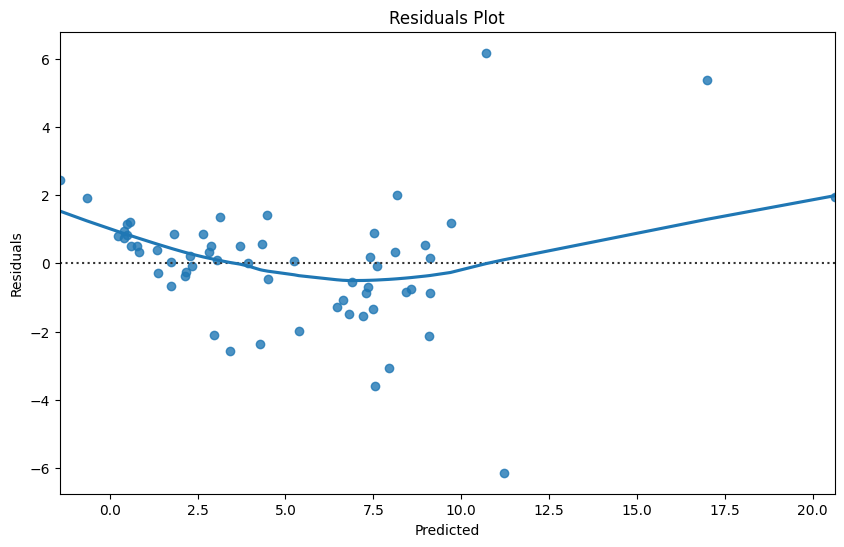

In [26]:
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


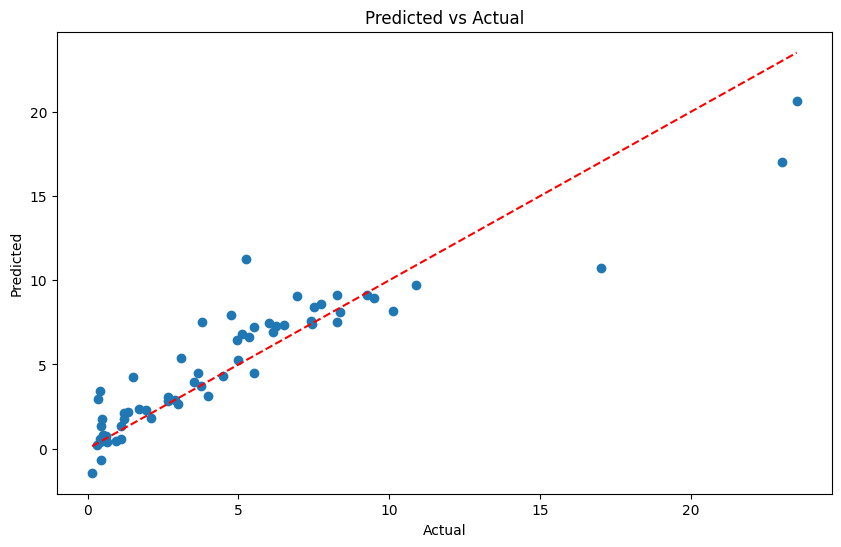

In [27]:
# Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual')
plt.show()
